In [1]:
import numpy as np
import proplot as pplt
import fitsio
import glob

%matplotlib inline

In [2]:
fnames = glob.glob("./data/**/*.fits.fz", recursive=True)

In [47]:

gvals = []
for fname in fnames:
    d = fitsio.read(fname)
    msk = (
        (d["mask_flags"] == 0)
        & (d["flags"] == 0)
        & (d["mdet_s2n"] > 10)
        & (d["mdet_T_ratio"] > 1.2)
        & (d["mfrac"] < 0.1)
    )
    gvals.append(d["psfrec_g"][msk, :].ravel())
    print(np.quantile(np.hstack(gvals), np.linspace(0, 1, 16)))
    

[-0.18421476 -0.01420421 -0.01157818 -0.0094939  -0.00783086 -0.00642993
 -0.00507575 -0.00359555 -0.0020146  -0.00021827  0.00140767  0.00353654
  0.00628166  0.00890403  0.0124038   0.09006009]
[-0.18421476 -0.01787883 -0.01480457 -0.01246149 -0.0105767  -0.00882826
 -0.00725145 -0.00589694 -0.00431207 -0.0027486  -0.00078797  0.00126625
  0.00403369  0.00762537  0.01168883  0.09006009]
[-0.18421476 -0.02237562 -0.01880477 -0.01585134 -0.01286273 -0.01034653
 -0.00790083 -0.00588414 -0.00375088 -0.00155329  0.00088952  0.00329863
  0.00595839  0.00893341  0.01285259  0.09006009]
[-0.18421476 -0.02171366 -0.01792842 -0.01471446 -0.01182342 -0.00932749
 -0.00713035 -0.00527568 -0.00324133 -0.0012209   0.00082881  0.00310006
  0.00561555  0.00847521  0.01228747  0.09006009]
[-0.18421476 -0.02095744 -0.01650976 -0.01279842 -0.00976723 -0.00725996
 -0.00522562 -0.00320528 -0.0013789   0.00038572  0.00207349  0.00380195
  0.00594299  0.00852514  0.01210962  0.09006009]
[-0.18421476 -0.0201

In [4]:
d = fitsio.read(fnames[0])

In [14]:
print("estimated # of sources in millions:", np.sum(msk)/6*1e4/1e6)

estimated # of sources in millions: 168.8483333333333


<a list of 1 Line2D objects>

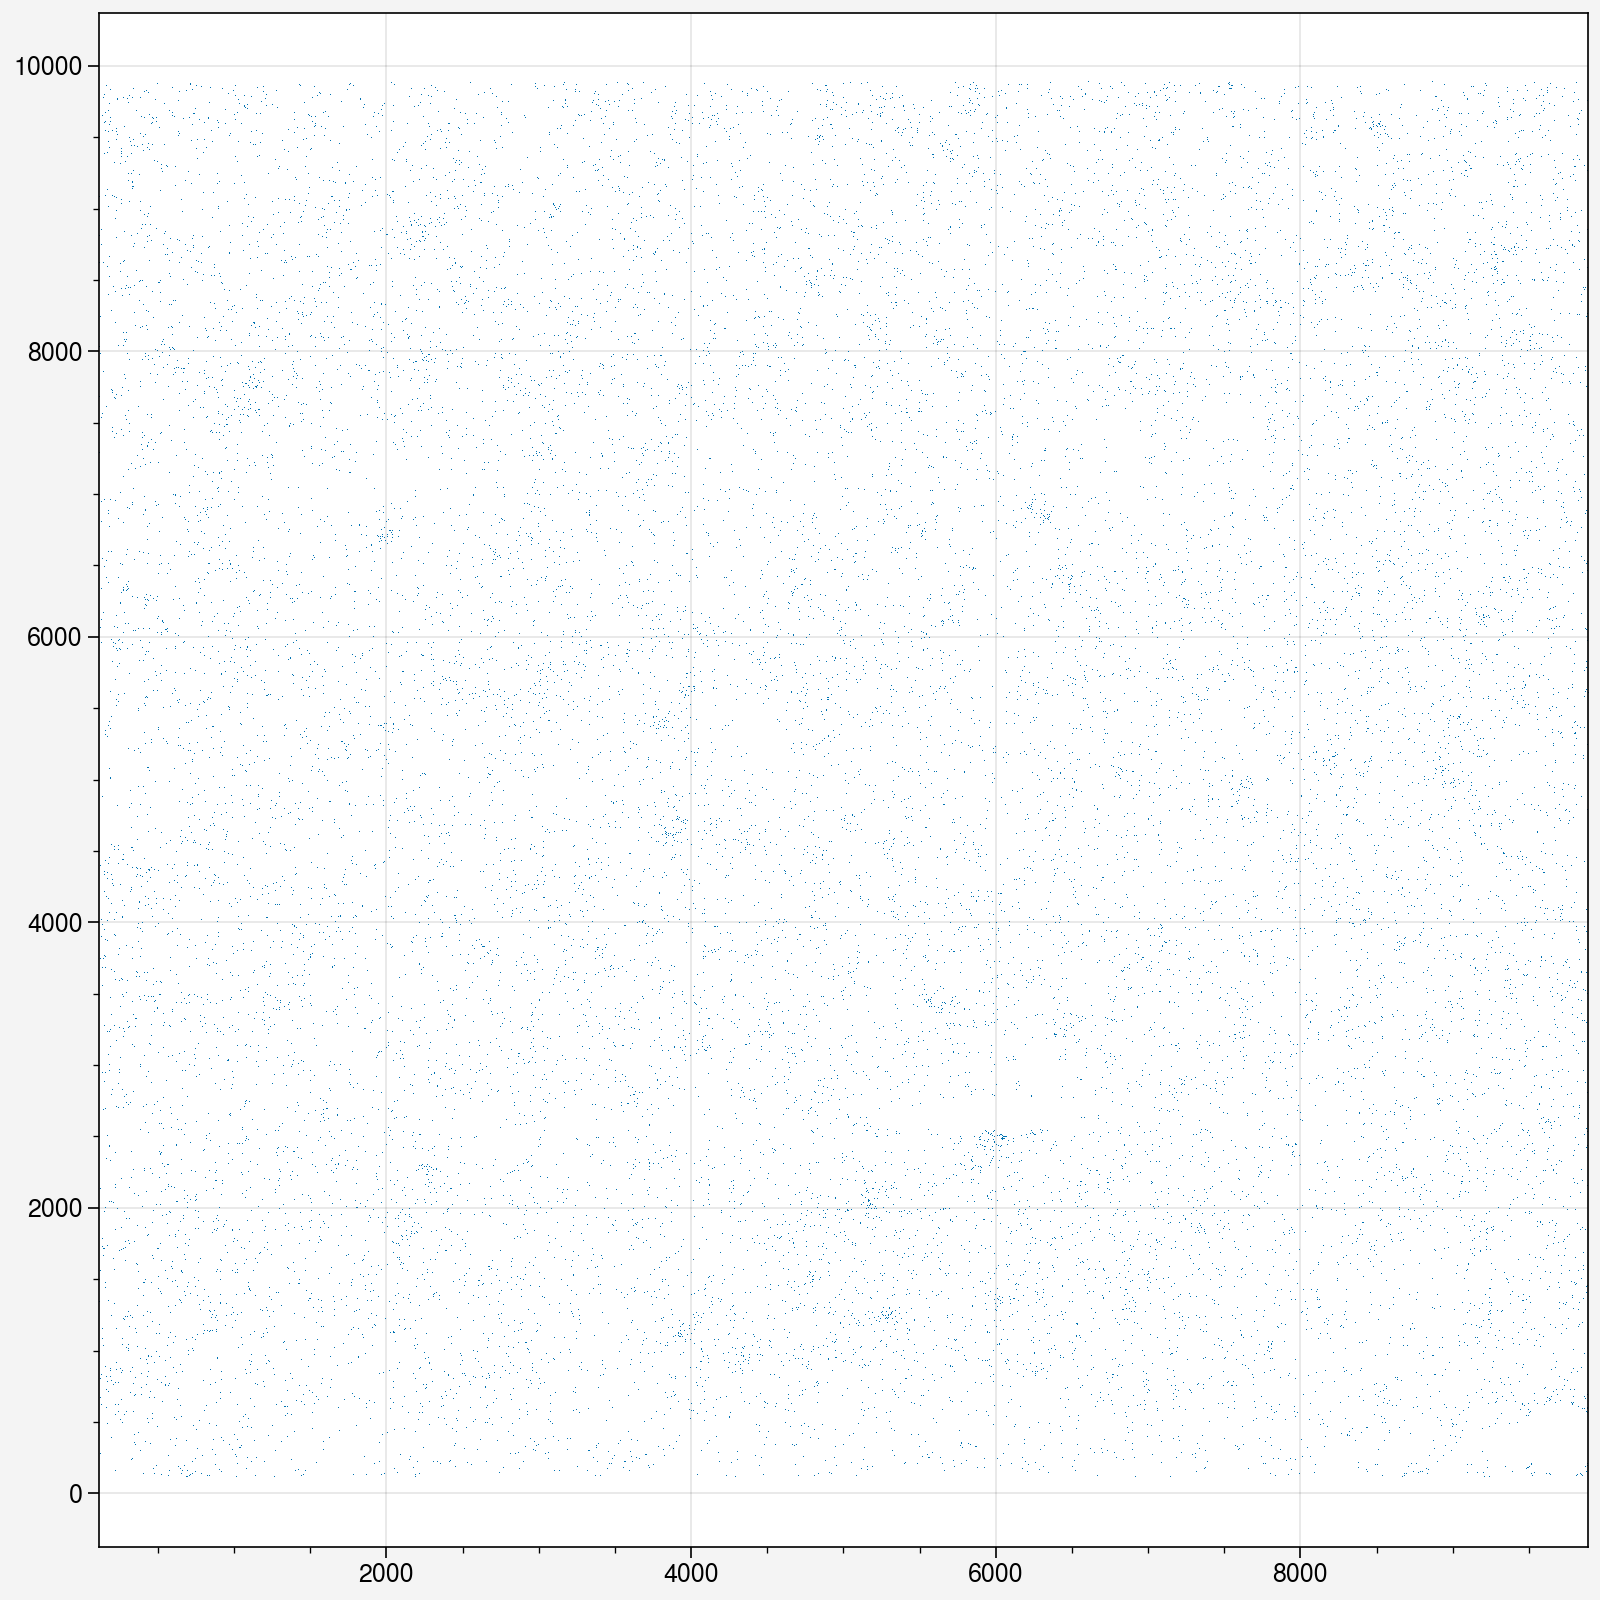

In [15]:
fig, axs = pplt.subplots(figsize=(8, 8))
axs.plot(d["col"][msk & (d["mdet_step"] == "noshear")], d["row"][msk & (d["mdet_step"] == "noshear")], ',')

In [42]:
def _bin_stats(bin_edges, binvals, mdet_step, g1, g2):
    binds = np.searchsorted(bin_edges, binvals, side='left')
    binds = np.clip(binds, 0, len(bin_edges)-2)
    
    res = {}
    for col in ["g1", "g2", "g1p", "g1m", "g2p", "g2m"]:
        res[col] = np.zeros(len(bin_edges)-1)
        res["n_%s" % col] = np.zeros(len(bin_edges)-1)
    
    for step in ["noshear", "1p", "1m", "2p", "2m"]:
        msk = mdet_step == step
        if step == "noshear":
            np.add.at(res["g1"], binds[msk], g1[msk])
            np.add.at(res["n_g1"], binds[msk], 1)
            np.add.at(res["g2"], binds[msk], g2[msk])
            np.add.at(res["n_g2"], binds[msk], 1)
        elif step == "1p":
            np.add.at(res["g1p"], binds[msk], g1[msk])
            np.add.at(res["n_g1p"], binds[msk], 1)
        elif step == "1m":
            np.add.at(res["g1m"], binds[msk], g1[msk])
            np.add.at(res["n_g1m"], binds[msk], 1)
        elif step == "2p":
            np.add.at(res["g2p"], binds[msk], g2[msk])
            np.add.at(res["n_g2p"], binds[msk], 1)
        elif step == "2m":
            np.add.at(res["g2m"], binds[msk], g2[msk])
            np.add.at(res["n_g2m"], binds[msk], 1)
    return res

In [43]:
bin_edges = np.quantile(d["psfrec_g"][msk].ravel(), np.linspace(0, 1, 16))
res = _bin_stats(
    bin_edges, 
    d["psfrec_g"][msk, 0], 
    d["mdet_step"][msk], 
    d["mdet_g"][msk, 0], 
    d["mdet_g"][msk, 1],
)

In [44]:
res

{'g1': array([ 0.82948677,  2.9912656 ,  3.2301473 ,  1.23028961, -2.9767978 ,
        -3.62237906, -0.54991346,  3.29993644,  1.613326  ,  1.44766019,
         0.74423484,  5.59220977,  2.31805919,  0.53221477,  0.64618544]),
 'n_g1': array([   8., 1487., 1826., 1591., 1721., 1619., 1727., 1766., 1604.,
        1783., 1686., 1475., 1072.,  595.,  294.]),
 'g2': array([ 0.08878108, -0.54941558, -3.75861204, -5.32181777, -4.69270284,
        -2.26464718, -6.26259665,  6.26253594,  0.08118724,  4.48996814,
         1.16573182,  4.15529633,  3.9194825 ,  4.63614078,  1.49948591]),
 'n_g2': array([   8., 1487., 1826., 1591., 1721., 1619., 1727., 1766., 1604.,
        1783., 1686., 1475., 1072.,  595.,  294.]),
 'g1p': array([ 0.91569479, 10.12971008,  8.1588318 ,  4.54324962,  2.32704155,
         2.80525887,  8.7156132 ,  5.42988583,  6.72048943,  8.46713086,
         6.66653177,  8.60667584,  6.80090067,  0.96900613,  1.13053328]),
 'n_g1p': array([   7., 1492., 1829., 1600., 1711., 1625

In [48]:
fitsio.write?